In [1]:
# Import statements

import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import sys 
import matplotlib.pyplot as plt
import pandas_profiling

In [2]:
# Load Data

sys.path.append('..')
from scripts import project_functions as pf
df = pf.load_and_process("../../data/raw/police_killings.csv")
df

age  gender     raceethnicity     month    armed   pop  share_Caucasian  \
0     16    Male  African American  February       No  3779             60.5   
1     27    Male         Caucasian     April       No  2769             53.8   
2     26    Male         Caucasian     March       No  4079             73.8   
3     25    Male   Hispanic/Latino     March  Firearm  4343              1.2   
4     29    Male         Caucasian     March       No  6809             92.5   
..   ...     ...               ...       ...      ...   ...              ...   
447   18    Male  African American     April       No  1640             40.9   
448   28    Male   Native American     April  Firearm  4154             74.5   
449   52    Male         Caucasian     March  Firearm  3850             83.2   
450   38  Female  African American  February  Firearm  2544             21.7   
451   48    Male           Unknown   January  Firearm  5177             23.1   

     income     urate age_group    pop_group income_bracket SC_category  
0     28375  0.097686   10 - 19  3000 - 4000  28000 - 29000        Half  
1     14678  0.065724   20 - 29  2000 - 3000  14000 - 15000        Half  
2     25286  0.166293   20 - 29  4000 - 5000  25000 - 26000        High  
3     17194  0.124827   20 - 29  4000 - 5000  17000 - 18000         Low  
4     33954  0.063550   20 - 29  6000 - 7000  33000 - 34000   Very High  
..      ...       ...       ...          ...            ...         ...  
447   25262  0.152047   10 - 19  1000 - 2000  25000 - 26000      Medium  
448   18470  0.133650   20 - 29  4000 - 5000  18000 - 19000        High  
449   21175  0.256150   50 - 59  3000 - 4000  21000 - 22000   Very High  
450   26971  0.069601   30 - 39  2000 - 3000  26000 - 27000      Medium  
451   33590  0.080912   40 - 49  5000 - 6000  33000 - 34000      Medium  

[452 rows x 13 columns]

In [3]:
# Setting aesthetics for plots

sns.set_theme(style="ticks", palette = 'muted', font_scale = 1.5)
plt.rc("axes.spines", top=False, right=False)

# Exploratory Data Analysis

In [4]:
# My dataset have 449 rows and 16 columns
print(f'(rows, columns) = {df.shape}')

#The data types of my dataset
print(df.dtypes)

(rows, columns) = (452, 13)
age                   int64
gender               object
raceethnicity        object
month                object
armed                object
pop                   int64
share_Caucasian     float64
income                int64
urate               float64
age_group          category
pop_group          category
income_bracket     category
SC_category        category
dtype: object


In [5]:
# This shows the range of my numerical columns

print(f"max of Age = {max(df['age'])} and min of Age= {min(df['age'])}")
print(f"max of Pop = {max(df['pop'])} and min of Pop= {min(df['pop'])}")
print(f"max of Share_Caucasian = {max(df['share_Caucasian'])} and min of Share_Caucasian = {min(df['share_Caucasian'])}")
print(f"max of Income = {max(df['income'])} and min of Income= {min(df['income'])}")
print(f"max of Urate = {max(df['urate'])} and min of Urate= {min(df['urate'])}")

max of Age = 87 and min of Age= 16
max of Pop = 13987 and min of Pop= 403
max of Share_Caucasian = 99.6 and min of Share_Caucasian = 0.0
max of Income = 86023 and min of Income= 5457
max of Urate = 0.507614213 and min of Urate= 0.011335013


In [8]:
#This alows me to get a better understanding of my discrete variables and inform me the complete variables in each column when making visualizations.

print(f"raceethnicity = {df.raceethnicity.unique()}")
print(f"month = {df.month.unique()}")
print(f"armed = {df.armed.unique()}")
print(f"age_group = {df.age_group.unique()}")
print(f"pop_group = {df.pop_group.unique()}")
print(f"income_bracket = {df.income_bracket.unique()}")
print(f"SW_category = {df.SC_category.unique()}")

raceethnicity = ['African American' 'Caucasian' 'Hispanic/Latino' 'Unknown'
 'Asian/Pacific Islander' 'Native American']
month = ['February' 'April' 'March' 'January' 'May' 'June']
armed = ['No' 'Firearm' 'Non-lethal firearm' 'Other' 'Knife' 'Vehicle' 'Disputed']
age_group = ['10 - 19', '20 - 29', '30 - 39', '40 - 49', '70 - 79', '50 - 59', '60 - 69', NaN]
Categories (8, object): ['0 - 9' < '10 - 19' < '20 - 29' < '30 - 39' < '40 - 49' < '50 - 59' < '60 - 69' < '70 - 79']
pop_group = ['3000 - 4000', '2000 - 3000', '4000 - 5000', '6000 - 7000', '5000 - 6000', ..., '10000 - 11000', '11000 - 12000', '12000 - 13000', '0 - 1000', NaN]
Length: 14
Categories (13, object): ['0 - 1000' < '1000 - 2000' < '2000 - 3000' < '3000 - 4000' ... '9000 - 10000' < '10000 - 11000' < '11000 - 12000' < '12000 - 13000']
income_bracket = ['28000 - 29000', '14000 - 15000', '25000 - 26000', '17000 - 18000', '33000 - 34000', ..., '49000 - 50000', '9000 - 10000', '43000 - 44000', '44000 - 45000', '52000 - 53000']


In [9]:
# This shows that there is nothing weird with the data and my method chains worked

df.describe().T.apply(lambda s: s.apply(lambda x: format(x, 'f')))

count          mean          std          min  \
age              452.000000     37.429204    13.032174    16.000000   
pop              452.000000   4704.028761  2019.709818   403.000000   
share_Caucasian  452.000000     51.467035    29.942338     0.000000   
income           452.000000  24166.836283  8964.077563  5457.000000   
urate            452.000000      0.118899     0.069466     0.011335   

                          25%           50%           75%           max  
age                 28.000000     35.000000     45.000000     87.000000  
pop               3354.750000   4438.500000   5757.000000  13987.000000  
share_Caucasian     25.950000     55.250000     76.975000     99.600000  
income           18163.750000  22185.000000  28420.250000  86023.000000  
urate                0.069552      0.106796      0.144526      0.507614

## *Heatmap*

#### Observations:

Age and Income only have a  weak positive correlation. 
I predicted that it would have a stronger positive correlation, as one would expect that older poeple are more financially stable. I think that this relationship might be moderated by the state where the incident happen and other factors so more analysis is needed for this relationship.

Pop and Share_Caucasian have a weak positive correlation.
I expected that there would be a stronger positive correlation between pop and share_Caucasian, as I thought there is a higher chance that there will be a greater share of Caucasians in a larger population.

Pop and Urate have have a medium negative correlation.
This is quite expected as a greater population might indicate that it is more urbanized and there is a larger talented workforce. Furthermore, as this is a negative correlation, it coincides with US being a developed country as it has enough jobs for their large population that increasing population does not increase the unemployment rate.

Share_Caucasian and Income have a medium positive correlation.
Racism and discrimination can contribute to this correlation as People of Color may find it harder to live in areas that have good job opportunities.

Share_Caucasian and Urate have a medium negative correlation.
Racism and discrimination can contribute to this correlation as People of Color may find it harder to live in areas that have good job opportunities.

Observation 4 and 5 validate each other as lower unemployment rate means that more people have a job, which can indicate that job opportunities are good in terms of availability and pay in the area. So the greater the share of the population that is Caucasian, the higher the median personal income and the lower the unemployment rate in the area.

Urate and Income have a strong negative correlation.
This is correct and expected as less unemployment rate, again, indicates the availability of good job opportunities in terms of availability and pay.

Text(0.5, 1.0, 'Heatmap')

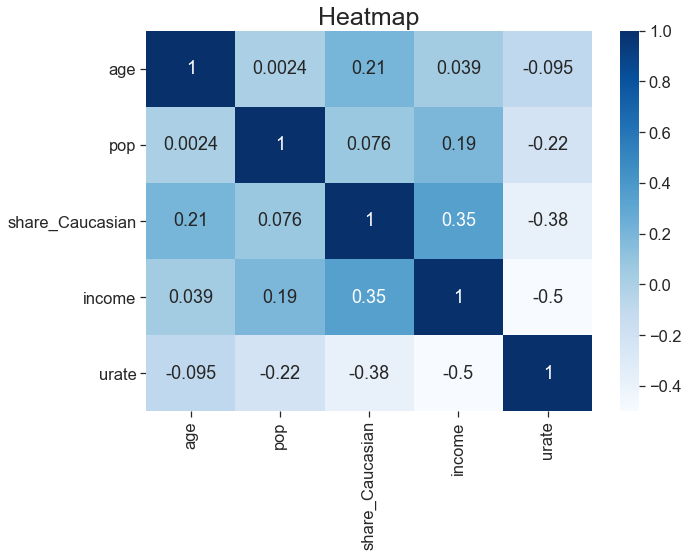

In [10]:
# Plotting Heatmap

plt.figure(figsize=(10,7))
corr = df.corr()
sns.heatmap(corr, annot = True, cmap = 'Blues')
plt.title("Heatmap", fontdict = {'fontsize':25})

## *Distribution Plot*
#### Observations:
- Victim age between 20 - 47 has the most cases.

- Area with urate between 0.05 - 0.15 has the most cases.

- Area with median personal income between \\$17,000 - $28,000 had the most cases.

- Area with population size between 2,500 - 5,500 has the most cases.

- Both sides of the extremes in Share_Caucasian seems to have more cases than when the share of the population that is Caucasian and People of Color are roughly equal. However, there doesn't seem to be a clear distinction as the histogram is leaning more toward a uniform distribution.

Text(0.35, 1.65, 'Histogram for Each Possible Numerical Risk Factor')

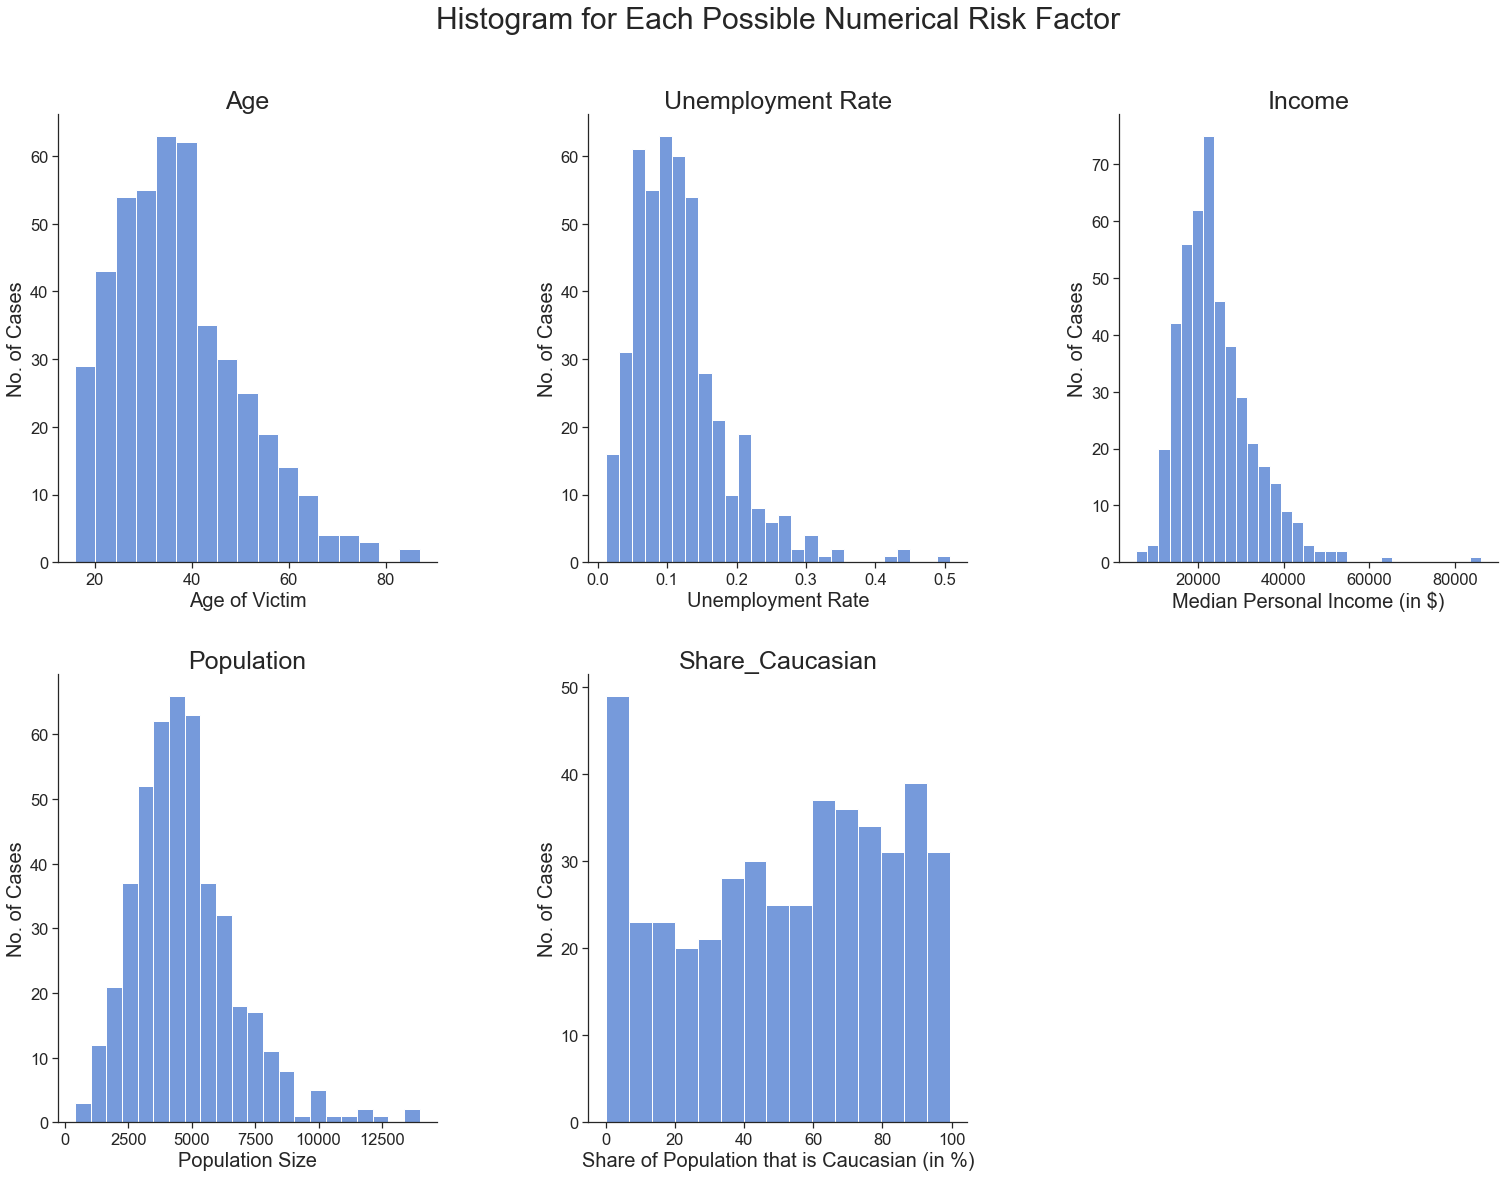

In [11]:
# Histogram for Numerical Data

fig, ax = plt.subplots(2, 3, figsize=(40,10))

sns.histplot(x='age', data = df, ax = ax[0,0])
ax[0,0].set_title('Age', size =25)
ax[0,0].set_xlabel('Age of Victim', fontsize = 20)
ax[0,0].set_ylabel('No. of Cases', fontsize = 20)

sns.histplot(x = 'urate', data = df, ax = ax[0,1])
ax[0,1].set_title('Unemployment Rate', size =25)
ax[0,1].set_xlabel('Unemployment Rate', fontsize = 20)
ax[0,1].set_ylabel('No. of Cases', fontsize = 20)

sns.histplot(x = 'income', data = df, ax = ax[0,2])
ax[0,2].set_title('Income', size =25)
ax[0,2].set_xlabel('Median Personal Income (in $)', fontsize = 20)
ax[0,2].set_ylabel('No. of Cases', fontsize = 20)

sns.histplot(x = 'pop', data = df, ax = ax[1,0])
ax[1,0].set_title('Population', size =25)
ax[1,0].set_xlabel('Population Size', fontsize = 20)
ax[1,0].set_ylabel('No. of Cases', fontsize = 20)

sns.histplot(x = 'share_Caucasian', data = df, ax = ax[1,1], bins = 15)
ax[1,1].set_title('Share_Caucasian', size =25)
ax[1,1].set_xlabel('Share of Population that is Caucasian (in %)', fontsize = 20)
ax[1,1].set_ylabel('No. of Cases', fontsize = 20)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.6, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.25)
fig.delaxes(ax[1,2])
plt.suptitle('Histogram for Each Possible Numerical Risk Factor', y=1.65, fontsize = 30, x= 0.35)

## *Countplot*
#### Observations:
- Male has more cases.

- For Race/ethnicity we need to be careful because the data is not population controled. The graph shows that Causcasian has the most cases, folowed by African American.

- There does not seem to be a significance difference in the number of cases in January to May. However, the number of cases in June is very low.

- Most cases involved the victim having a firearm. However, it is important to note that the number of cases with victims who was not armed make up roughly half of the cases with victims armed with firearm.

Text(0.45, 1.6, 'Countplot for Each Possible Categorical Risk Factor')

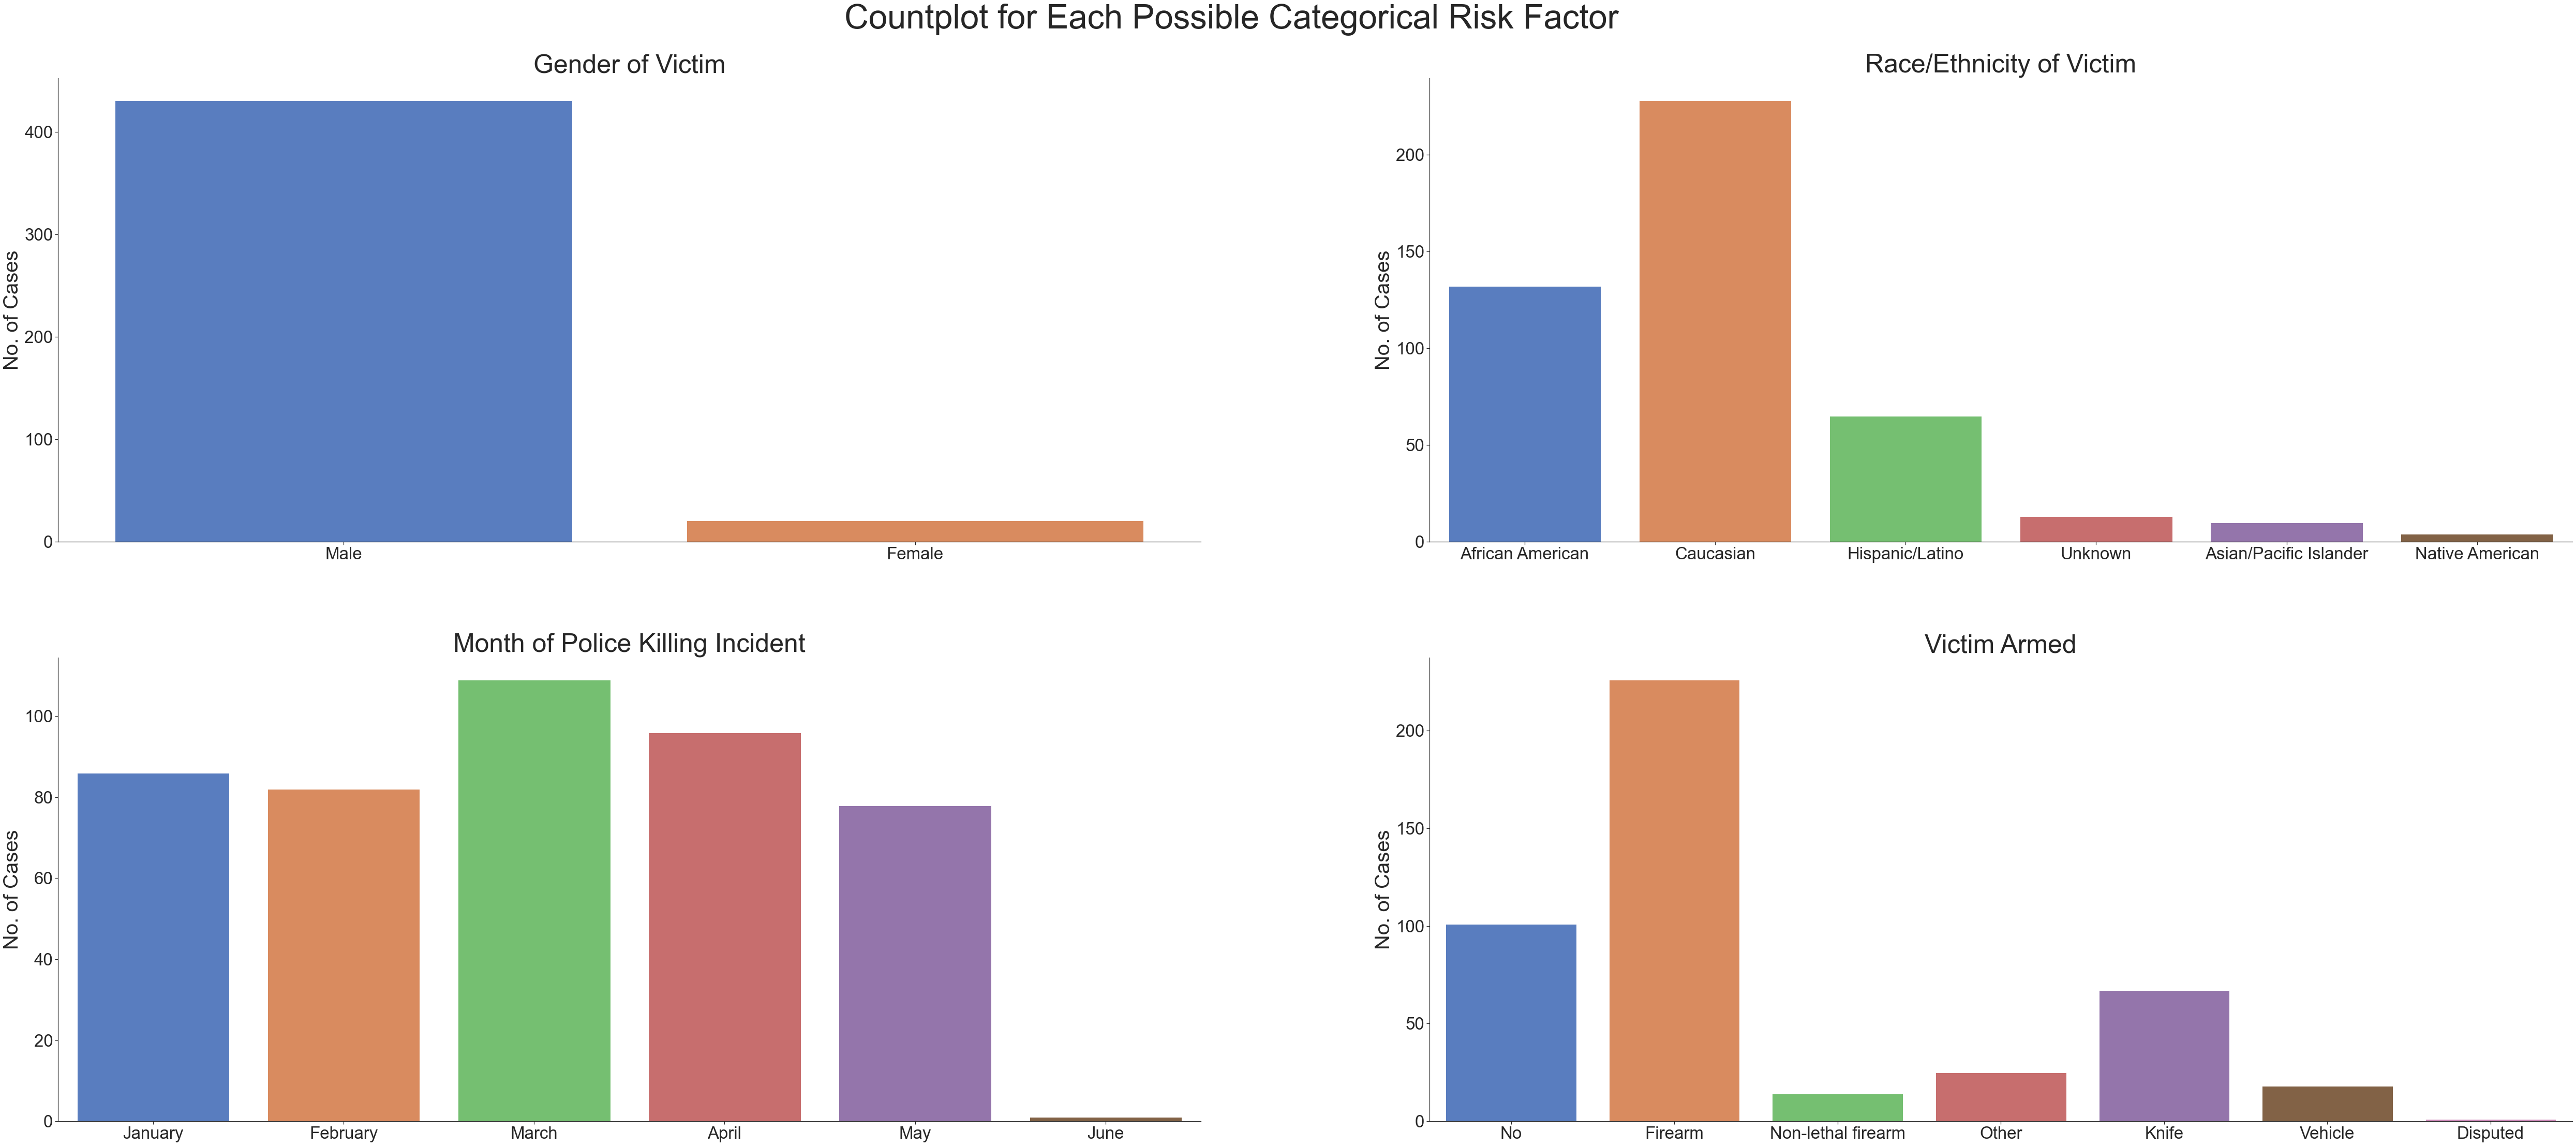

In [12]:
# Count Plot for Categorical Data

sns.set_theme(style="ticks", palette = 'muted', font_scale = 3)
plt.rc("axes.spines", top=False, right=False)

fig, ax = plt.subplots(2, 2, figsize=(90,20))

sns.countplot(x='gender', data = df, ax = ax[0,0])
ax[0,0].set_title('Gender of Victim', size =50)
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('No. of Cases', fontsize = 40)

sns.countplot(x='raceethnicity', data = df, ax = ax[0,1])
ax[0,1].set_title('Race/Ethnicity of Victim', size =50)
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('No. of Cases', fontsize = 40)

order = ('January', 'February', 'March', 'April', 'May', 'June')
sns.countplot(x='month', data = df, order = order, ax = ax[1,0])
ax[1,0].set_title('Month of Police Killing Incident', size =50)
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('No. of Cases', fontsize = 40)

sns.countplot(x='armed', data = df, ax = ax[1,1])
ax[1,1].set_title('Victim Armed', size =50)
ax[1,1].set_xlabel('')
ax[1,1].set_ylabel('No. of Cases', fontsize = 40)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.85, 
                    top=1.5, 
                    wspace=0.2, 
                    hspace=0.25)
#fig.delaxes(ax[1,2])
plt.suptitle('Countplot for Each Possible Categorical Risk Factor', y=1.6, fontsize = 65, x=0.45)

In [13]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Research Question
Are the following variables a risk factor for the occurance of a pollice killing accident?
    
1. Victim's Age 
    
2. Income 
    
3. Population size  
    
4. Share of Population that is Caucasian
    
5. Month of Incident
    
6. Victim armed 
    
7. Victim's Race/Ethnicity
    
8. Victim's Gender
    
#### Disclamer:
    
**It is important to note that the dataset used in this analysis is small and the significance of each risk factor discovered is not measured.** 

**Risk factors identified are only based on the frequency of that risk factor in the dataset used.** 

**Further analysis is required to make stronger cause/effect relationship between a variable and the occurance of a police killing accident.**

In [14]:
#Reset asthethic settings for plots
sns.set_theme(style="ticks", palette = 'muted', font_scale = 1.5)
plt.rc("axes.spines", top=False, right=False)

## *Age and Income*

Age and Income are related to each other based on my EDA. Therefore, I have put the KDE plot for Age and Income side-by-side to improve my analysis.

#### - Age
The KDE graph seem to show that age is a risk factor as certain ages, particularly ages 20-40, have a higher probability of being killed by the police. 
This observation corresponds to the EDA I did on age where the histogram shows the highest count of cases for ages 20-47.

#### - Income
Median personal income between \\$15,000 - $25,000 seems to be a risk factor as there is a sharp peak in probability for that income range, which is the lower-income bracket. This trend is also shown in the histogram on income in my EDA. Therefore, poorer areas have a higher risk of police incidents.

*Possible reasons for this observation (not an exhausive list):*

First, people living in a poorer area can indicate that they have lower income and people with lower income may be more likely to be involved in crimes. Second, the police may feel they have more power over poorer areas.

#### - Age and Income Correlation
The observation that being in middle age and having a lower income are risk factors provide support for the weak positive correlation between Age and Income I found during EDA. 
The risk factors support the correlation becasue the age range with higher risk is pretty big and the risk is highest for low income areas. Therefore, it shows that someone being older is not more likely to have higher income.

Text(0.5, 1.1, 'Probability of Police Killing Incident based on Age and Income')

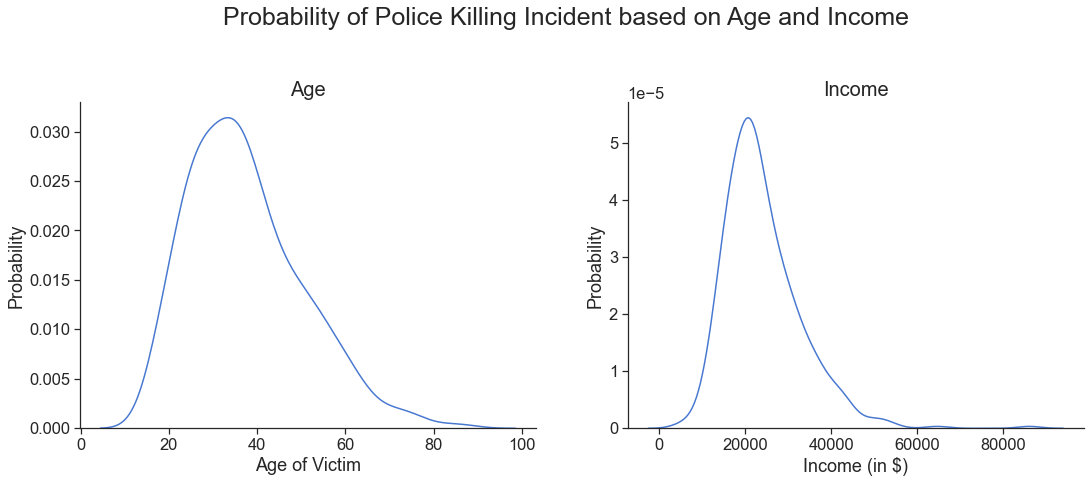

In [15]:
# KDE Plot for 'age' and 'income'

fig, ax = plt.subplots(1, 2, figsize = (18,6))

sns.kdeplot(df['age'], ax = ax[0])
ax[0].set_title('Age', size = 20)
ax[0].set_xlabel('Age of Victim', size = 18)
ax[0].set_ylabel('Probability', size = 18)


sns.kdeplot(x = 'income', data = df, ax = ax[1])
ax[1].set_title('Income', size = 20)
ax[1].set_xlabel('Income (in $)', size = 18)
ax[1].set_ylabel('Probability', size = 18)

plt.suptitle('Probability of Police Killing Incident based on Age and Income', y=1.1, fontsize = 25, x=0.5)

## *Population Size*

The KDE plot shows that population size can be a risk factor. An area with 2,500 - 5,500 population size seem to have a higher probability of a police incident occuring and therefore is a risk factor. 
This observation coincides with the histogram in the EDA that shows a distinct peak in that population size range.

*Possible reasons for this observation (not an exhausive list):*

First, an area that have a larger population size have more people and possibly crimes, so it increases the probability of a police killing incident to occur. Second, being surrounded by more people can provide a sense of anonimity that may promote more extreme behaviors. I assume that police killing incidents that do not have valid reasons or facts can be considered as an extreme behavior.

Text(0, 0.5, 'Probability')

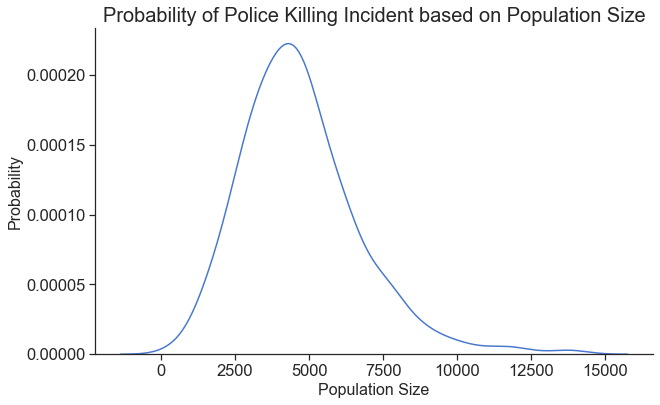

In [16]:
# KDE Plot for 'pop'
plt.subplots(figsize = (10,6))
plt.title('Probability of Police Killing Incident based on Population Size', fontdict = {'fontsize':20})
sns.kdeplot(x = 'pop', data =df)
plt.xlabel('Population Size', fontdict = {'fontsize':16})
plt.ylabel('Probability', fontdict = {'fontsize':16})

## *Share of Population that is Caucasian*

There doesn't seem to be a large distinction in the graph for share_Caucasian. 
However, there seems to be an upward trend where the higher the share of the population that is Caucasian, the higher the probability of a police killing accident to occur.

This observation does not fully coincide with the EDA. However, both graphs shows the same trend, where the data distribution is uniform. 

Further analysis is needed to conclude whether there is a significant difference in the probability that a police killing an incident will occur between low and high share of the population that is Caucasian. 
From there, a further conclusion of whether the share of the population that is Caucasian is a risk factor can then be made.

In conclusion, I do not conclude that share of population that is Caucasian is a risk factor due to the uniform distribution of the data.

Text(0, 0.5, 'Probability')

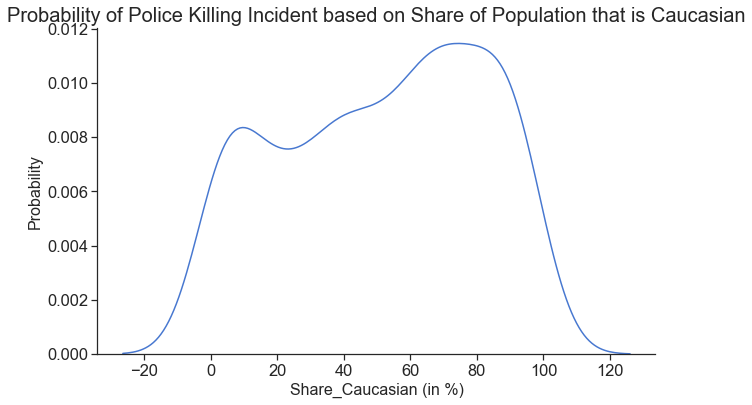

In [17]:
# KDE Plot for 'share_Caucasian'

plt.subplots(figsize = (10,6))
plt.title('Probability of Police Killing Incident based on Share of Population that is Caucasian', fontdict = {'fontsize':20})
sns.kdeplot(x = 'share_Caucasian', data =df)
plt.xlabel('Share_Caucasian (in %)', fontdict = {'fontsize':16})
plt.ylabel('Probability', fontdict = {'fontsize':16})

## *Month of incident*

The number of cases peaked in March but overall, there doesn't seem to be a significant difference in the number of cases for January to May; this observation coincides with the EDA.

The number of cases dropped significantly in June. However, the data description specified that the data was downloaded on June 2, 2015. Therefore, this can be a very likely explanation to why the number of cases in June are so low. 

The trend of cases by month can be mediated by several variables. These variables might include (not an exhausive list): the number of crimes that occur in each month and the economy's health. Therefore due to third variables, the current dataset is not enough to make conclusions for the probability that a police incident will occur based on the month.

In conclusion, based on the EDA and this graph, I would not consider month as a risk factor because of the uniform data distribution and the likely potential of missing data.

Text(0.5, 0, '')

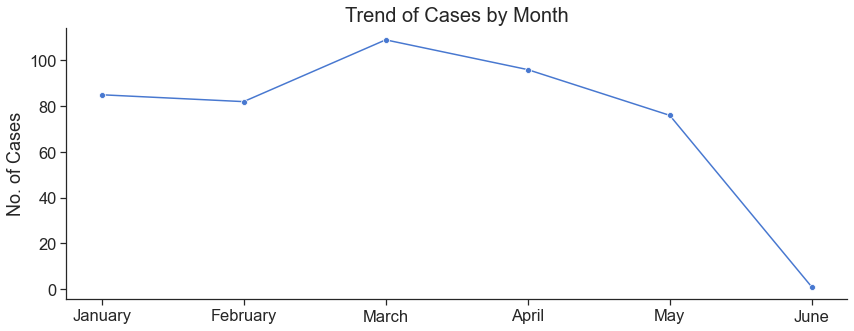

In [18]:
# Lineplot for 'month'

plt.figure(figsize=(14,5))
a =df['month'].value_counts()
b = {'month': ['January', 'February', 'March','April', 'May', 'June'], 'cases': [85, 82, 109, 96, 76, 1]}
c = pd.DataFrame(data=b)
c

sns.lineplot(x = 'month', y = 'cases', data= c, marker = 'o')
plt.title('Trend of Cases by Month',fontdict = {'fontsize':20} )
plt.ylabel('No. of Cases', fontdict = {'fontsize':18})
plt.xlabel('')

## *Victim Armed*

I have chosen to use a barplot and a pie chart to analyze the Armed column. The barplot visualizes the same data as the countplot, but just another method to do it, and the pie chart displays the percentage of each variable in the Armed column. I've decided to use a pie chart so that I can more easily show the share/percentage of each variable in the Armed column. However, taking into account the limitation of pie charts, I paired it with a barplot.

As shown in the pie chart, half of the cases involve the victim being armed with a firearm. The barplot also clearly shows that firearm is present in the greatest amount of cases.
Therefore, I consider being armed with firearm as a risk factor. This observation is expected as if the victim is armed with firearm, they pose a greater threat to the police and civilians so the police needs to take extreme measures.

However, it is important to note that the number of cases that did not involve any weapon is roughly half of the cases that have a firearm present. Furthermore, the number of cases without any weapon is greater than the number of cases armed with other objects.
This observation is very interesting for me because someone without any object or weapon should pose less threat to the police and reduce the likelihood of a police killing acident, and I would like to explore it further; however, the current dataset is not suitable for that analysis as there is no other data in the dataset that describe the situational factors further. Therefore, further analysis with a new dataset is needed to understand why there are so many cases of police killings whose victims were not armed.

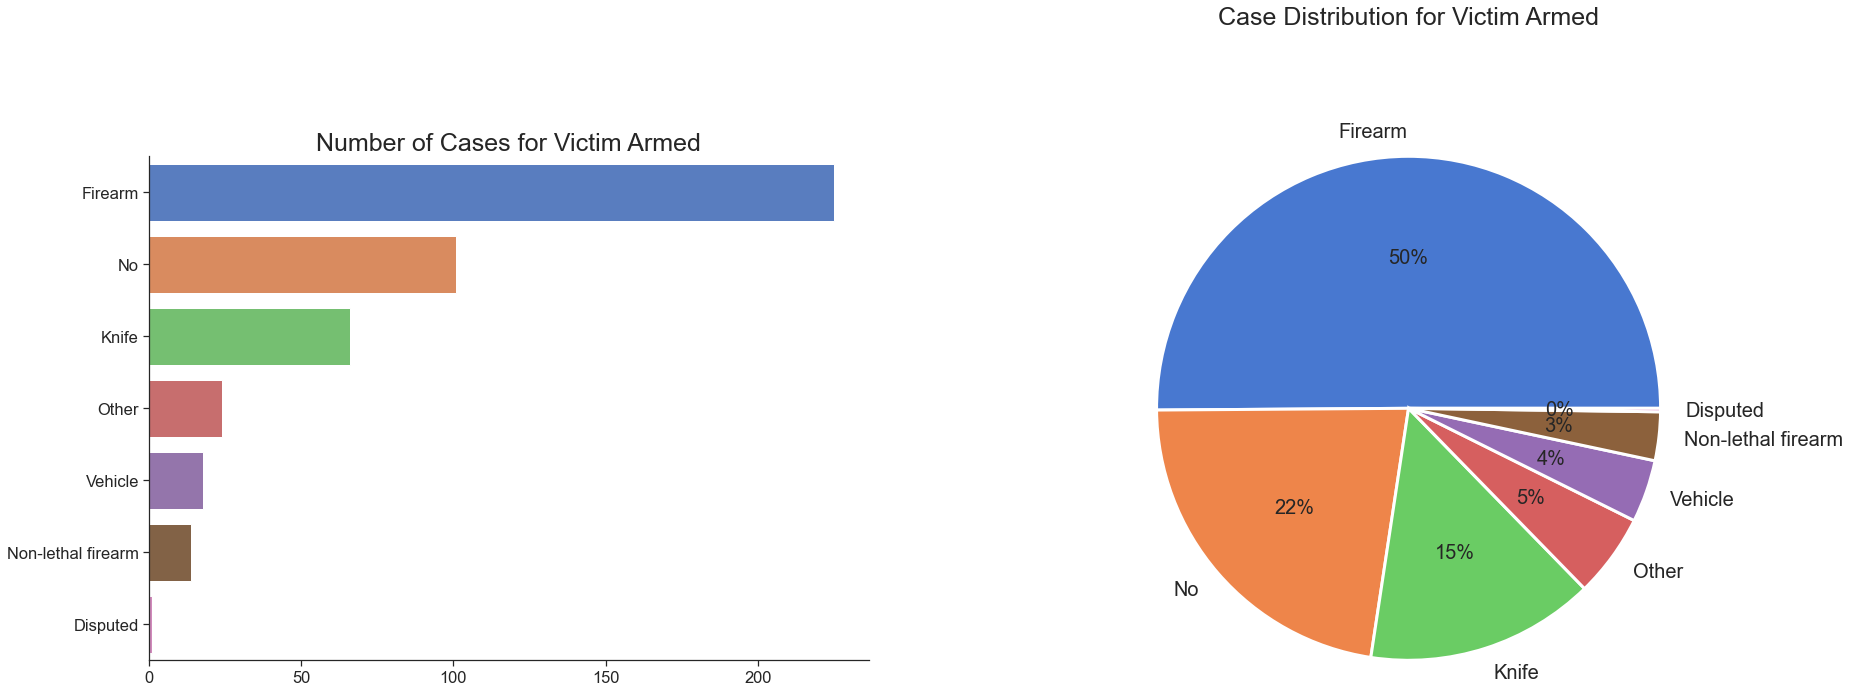

In [24]:
# Barplot and Pie Chart for 'armed'

j = df['armed'].value_counts()
k = {'armed': ['Firearm', 'No', 'Knife', 'Other', 'Vehicle', 'Non-lethal firearm', 'Disputed'], 
     'cases': [225, 101, 66, 24, 18, 14,1]}
l = pd.DataFrame(data=k)


fig, ax = plt.subplots(1, 2, figsize=(25,5))

sns.barplot(y = 'armed', x = 'cases', data= l, ax= ax[0])
ax[0].set_title('Number of Cases for Victim Armed', size = 25)
ax[0].set_xlabel('')
ax[0].set_ylabel('')

label_armed = list(l['armed'])
ax[1].pie(x=k['cases'], 
        labels = label_armed, labeldistance = 1.1, 
        radius =1.25, 
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, 
        textprops={'fontsize':20},
        autopct='%1.f%%')
ax[1].set_title('Case Distribution for Victim Armed', size = 25, y=1.25)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=1.5, 
                    wspace=0.25, 
                    hspace=0.25)

## *Victim's Race/Ethnicity*

For the analysis of the Race/Ethnicity risk factor, I also paired a barplot and a pie chart for the same reasons that I explained in my analysis of the Victim Armed risk factor.

The barplot shows that Caucasian has the higher number of cases and the pie chart shows that Caucasians make up of 51% of the total cases. However, this data is not population controled so I need to be careful in making conclusions from this graph.

Even without population control, the number of cases for African Americans is still more than half of Caucasians, which is a red flag because they have a smaller population.

This is the actual population size for the year 2015: Caucasian = 247.38 million and African American = 42.53 million.
So if we control for population, 0.00009217% of Caucasians and 0.00031037% of African Americans are killed in 2015 by police.
By controlling for population, we can see that for African Americans, the cases of police killing incidents hold a larger percentage of their total population. However, I cannot conclude whether the difference between the percentages have a significant effect.

In conclusion, I cannot consider Victim's Race/Ethnicity as a risk factor because the data is not population controlled and I do not have information what difference in percentage of cases from the total population is considered significant.

Reference for US population size in 2015: https://www.statista.com/statistics/183489/population-of-the-us-by-ethnicity-since-2000/

In [32]:
# Calcualte the Share of Cases Based on Race/Ethnicity with Population Control

df['raceethnicity'].value_counts()
ControledPop_Caucasian = (228/247380000)*100
ControledPop_AfricanAmerican = (132/42530000)*100
print(f'{ControledPop_Caucasian:.8f}% of Caucasians are killed by police in 2015.')
print(f'{ControledPop_AfricanAmerican:.8f}% of African Americans are killed by police in 2015.')

0.00009217% of Caucasians are killed by police in 2015.
0.00031037% of African Americans are killed by police in 2015.


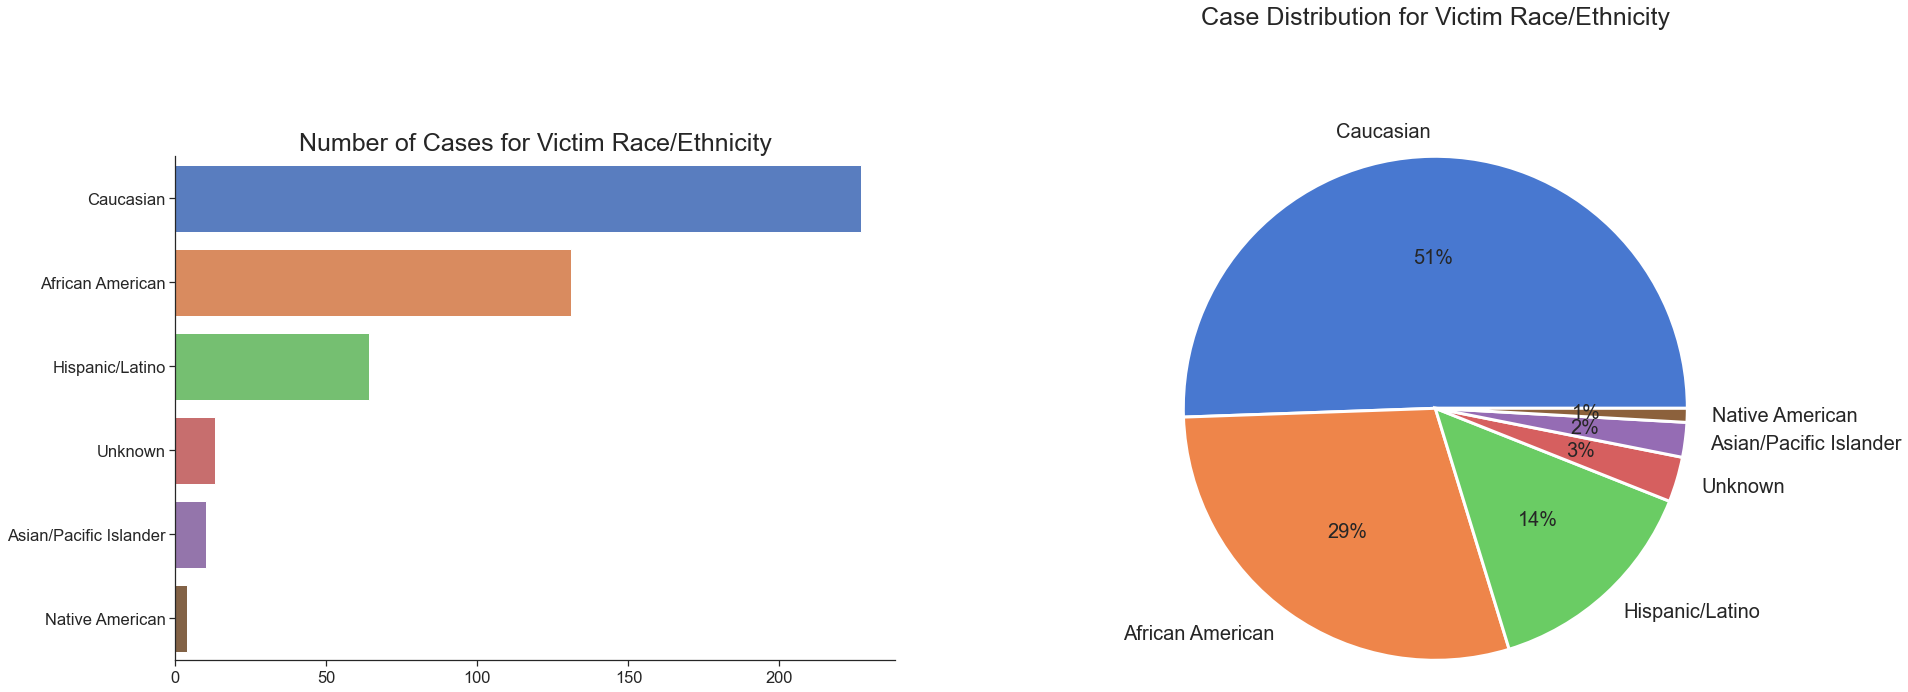

In [25]:
# Barplot and Pie Chart for 'raceethnicity'

g = df['raceethnicity'].value_counts()
h = {'raceethnicity': ['Caucasian','African American', 'Hispanic/Latino', 'Unknown', 'Asian/Pacific Islander', 'Native American'], 
     'cases': [227, 131, 64, 13, 10, 4]}
i = pd.DataFrame(data=h)


fig, ax = plt.subplots(1, 2, figsize=(25,5))

sns.barplot(y = 'raceethnicity', x = 'cases', data= i, ax= ax[0])
ax[0].set_title("Number of Cases for Victim Race/Ethnicity", size = 25)
ax[0].set_xlabel('')
ax[0].set_ylabel('')

label_RE = list(i['raceethnicity'])
ax[1].pie(x=i['cases'], 
        labels = label_RE, labeldistance = 1.1, 
        radius =1.25, 
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, 
        textprops={'fontsize':20},
        autopct='%1.f%%')
ax[1].set_title('Case Distribution for Victim Race/Ethnicity', size = 25, y=1.25)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=1.5, 
                    wspace=0.25, 
                    hspace=0.25)

## *Victim's Gender*

Based on the EDA I conclude that that the victim's gender, in this case male, is a risk factor as the EDA graph show that male has significantly higher number of cases than females; 95% (428/449) of the cases is male.

Since the EDA on gender have already shown a clear, significant difference in the number of cases between male and female, I'm focusing instead in trying to explain the EDA in this analysis.
I'm doing this by showing the share of male and female for 4 of the risk factors.

The graphs below shows that the female cases have the risk factors that I discussed above:
    
- Most of the female cases fall inside the age bracket (20 - 40) with greater risk.
- Some of the female cases fall in the median personal income bracket ($15,000 - $25,000) with greater risk.
- Most of the female cases happened in areas where the population size is within the population size range (2,500 - 5,500) with greater risk.
- Almost all of the female cases have a firearm or not equiped with anything.

In conclusion, I cannot explain the distribution of gender based on the dataset that I have now because the data show that the female cases also have the risk factors that I discovered above.

Text(0.7, 1.7, 'Analyzing Reasons for the Gender Risk Factor')

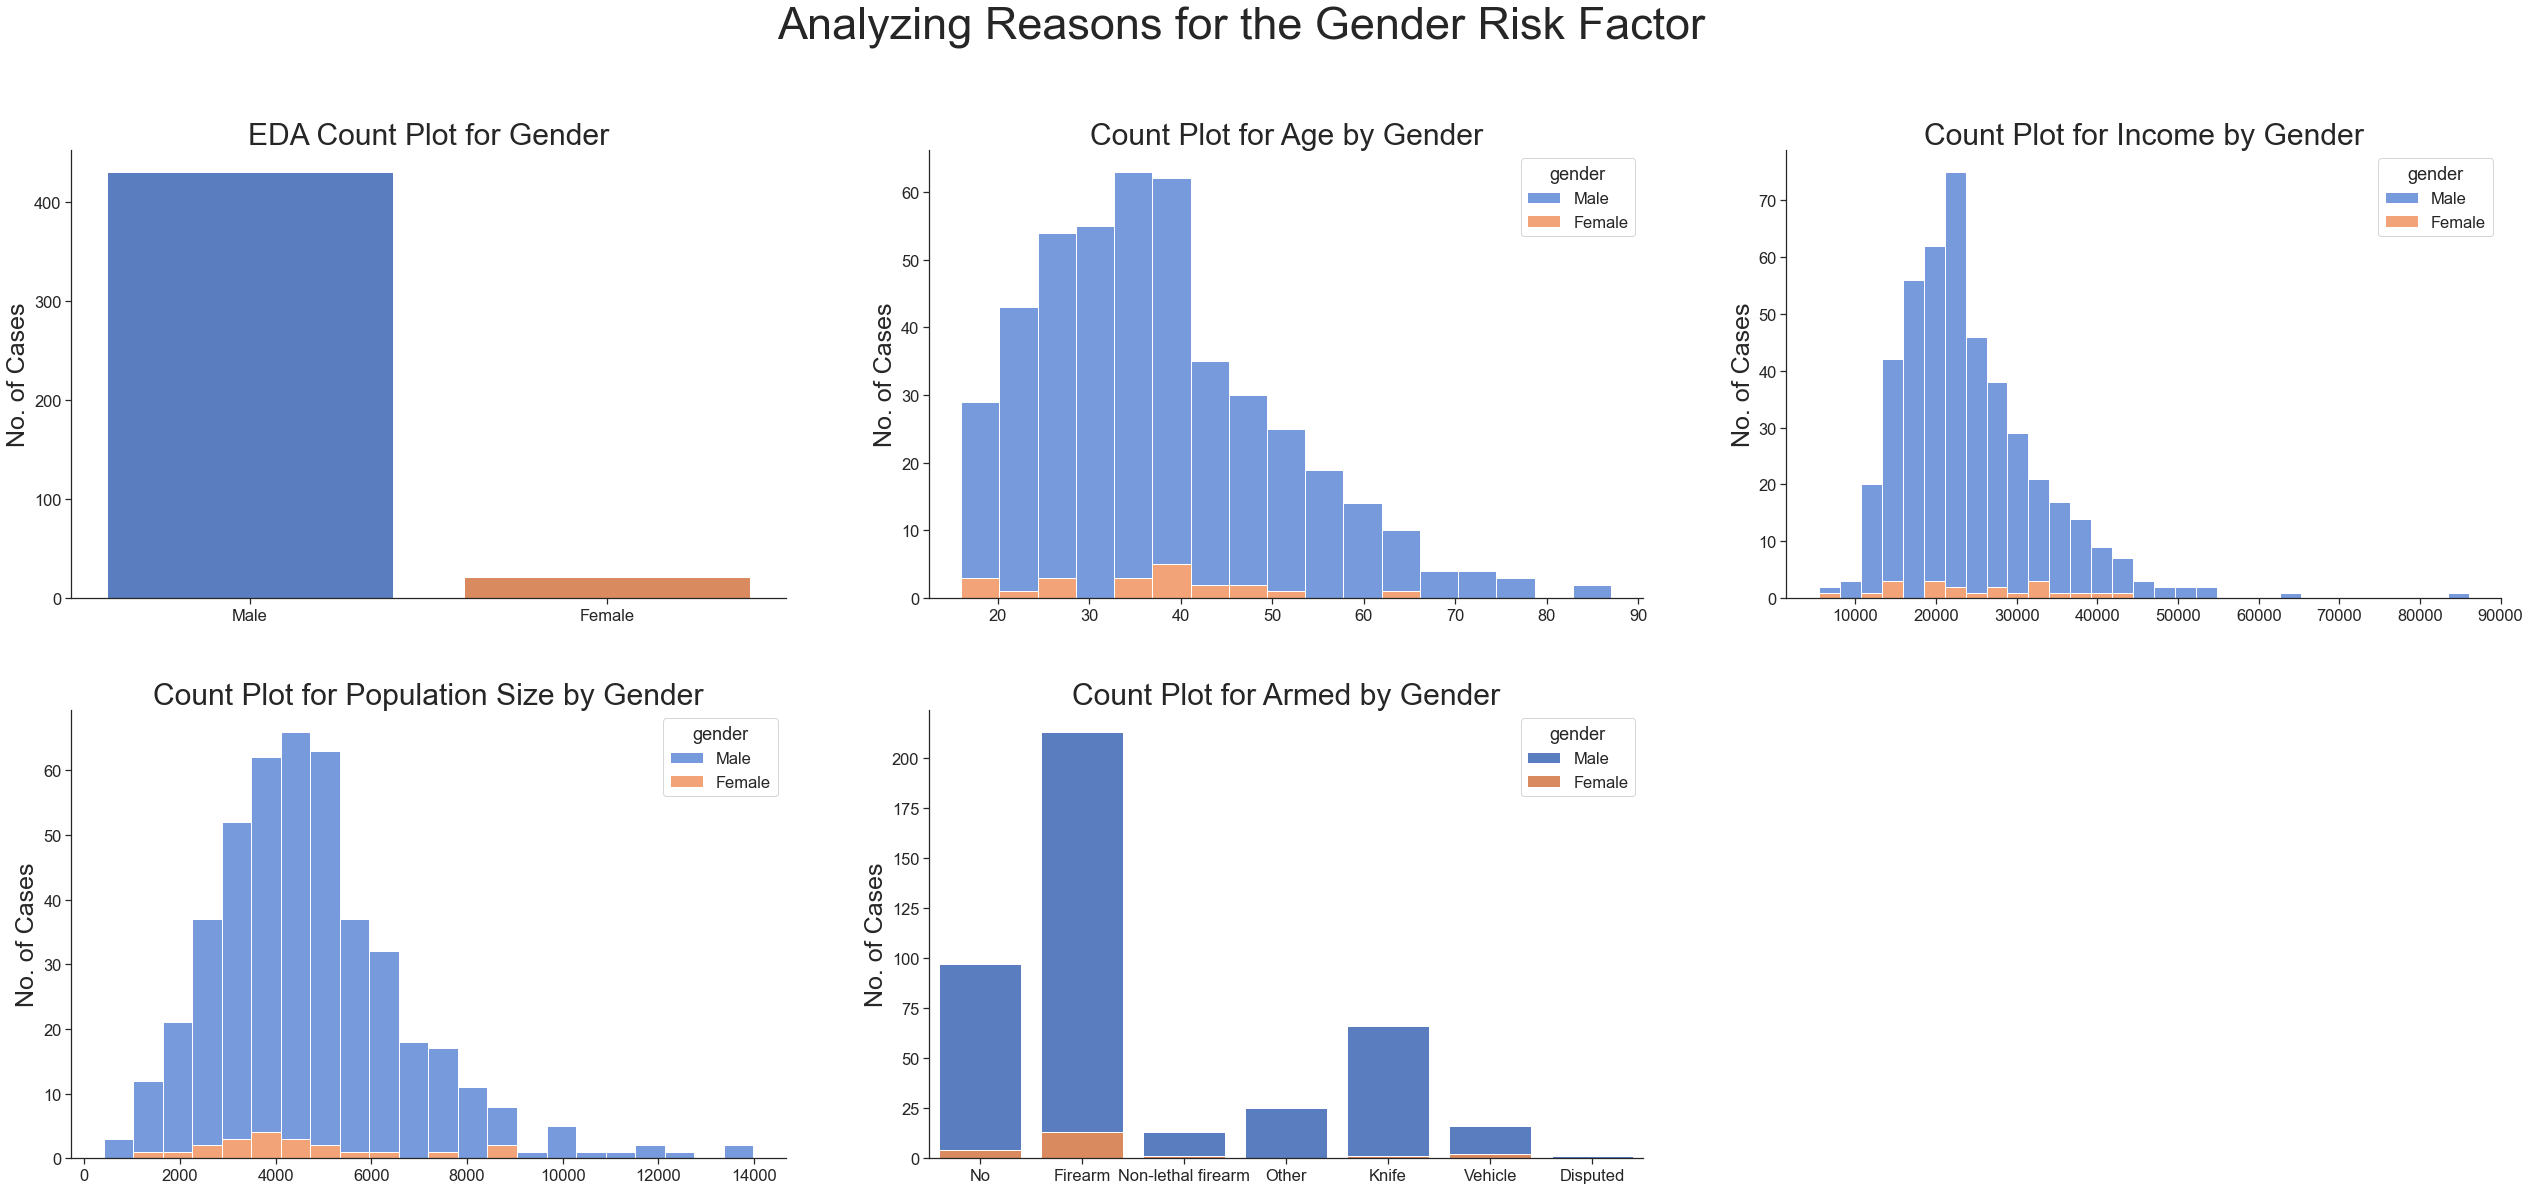

In [21]:
# Countplot for 'gender' with different hue

d = df['gender'].value_counts()
e = {'gender': ['Male','Female'], 'cases': [428,21]}
f = pd.DataFrame(data=e)


fig, ax = plt.subplots(2, 3, figsize = (25, 10))

sns.countplot(x='gender', data = df, ax = ax[0,0])
ax[0,0].set_title('EDA Count Plot for Gender', size =30)
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('No. of Cases', fontsize = 25)

sns.histplot(x = 'age', data=df, hue='gender', multiple='stack', ax = ax[0,1])
ax[0,1].set_title('Count Plot for Age by Gender', size =30)
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('No. of Cases', fontsize = 25)

sns.histplot(x='income', data=df, hue='gender', multiple='stack', ax = ax[0,2])
ax[0,2].set_title('Count Plot for Income by Gender', size =30)
ax[0,2].set_xlabel('')
ax[0,2].set_ylabel('No. of Cases', fontsize = 25)

sns.histplot(x ='pop', data=df, hue='gender', multiple='stack', ax = ax[1,0])
ax[1,0].set_title('Count Plot for Population Size by Gender', size =30)
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('No. of Cases', fontsize = 25)

sns.countplot(x='armed', data = df, hue = 'gender', dodge = False, ax = ax[1,1])
ax[1,1].set_title('Count Plot for Armed by Gender', size =30)
ax[1,1].set_xlabel('')
ax[1,1].set_ylabel('No. of Cases', fontsize = 25)


plt.subplots_adjust(left=0.05,
                    bottom=0.1, 
                    right=1.4, 
                    top=1.5, 
                    wspace=0.2, 
                    hspace=0.25)
fig.delaxes(ax[1,2])
plt.suptitle('Analyzing Reasons for the Gender Risk Factor', y=1.7, fontsize = 45, x=0.7)

# Conclusion

*Research Question:* 
Are the following variables a risk factor for the occurance of a pollice killing accident?

1. Victim's Age 
    
2. Income 
    
3. Population size  
    
4. Share of Population that is Caucasian
    
5. Month of Incident
    
6. Victim armed 
    
7. Victim's Race/Ethnicity
    
8. Victim's Gender


*Answer to Research Question:* 

Based on the analysis performed the victim's age, median personal income of an area, population size of an area, victim being armed, and victim's gender are risk factors. The following are the detailed risk factors:

1. Victim's Age: the age 20 - 40 seems to be a risk factor
2. Income: the median personal income \\$15,000 - $25,000 in an area seems to be a risk factor 
3. Population Size: the poulation size 2,500 - 5,500 in an area seems to be a risk factor 
4. Victim Armed: being armed with firearm seems to be a risk factor
5. Victim's Gender: being male seems to be a risk factor



It is important to note that the dataset used in this analysis is small and the significance of each risk factor discovered is not measured.
Furthermore, risk factors identified is only based on the frequency of that risk factor in the dataset used.
Lastly, the differences in probabilities for the KDE plots are quite small so more analysis is needed whether that difference is significant.

Further analysis is required to make stronger cause/effect relationship between a variable and the occurance of a police killing accident.